Author: Yicun Wu <br>
Description: Preprocess msmad dataset, convert address to census tract and match with dataset, find correlation

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/CS506 Spark Fairhouse Team1 Coding/data/addresses_census_tract/

Mounted at /content/drive
/content/drive/Shareddrives/CS506 Spark Fairhouse Team1 Coding/data/addresses_census_tract


In [7]:
!ls

GeocodeResults10.csv  GeocodeResults4.csv  GeocodeResults8.csv
GeocodeResults1.csv   GeocodeResults5.csv  GeocodeResults9.csv
GeocodeResults2.csv   GeocodeResults6.csv
GeocodeResults3.csv   GeocodeResults7.csv


In [8]:
import pandas as pd

# Create an empty dataframe to hold the combined data
combined_data = pd.DataFrame()

# Loop through each CSV file and append its data to the combined dataframe
for i in range(1, 11):
    file_name = f"GeocodeResults{i}.csv"
    data = pd.read_csv(file_name)
    combined_data = combined_data.append(data)

# Write the combined data to a new CSV file
combined_data.to_csv("combined_data.csv", index=False)


<ipython-input-8-f5d2601c379e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data)
<ipython-input-8-f5d2601c379e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data)
<ipython-input-8-f5d2601c379e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data)
<ipython-input-8-f5d2601c379e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data)
<ipython-input-8-f5d2601c379e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [24]:
import pandas as pd

# Read the combined dataset into a pandas dataframe
combined_data = pd.read_csv("combined_data.csv", header=None)

# Drop any rows where column 9, 10, or 11 is empty
combined_data = combined_data.dropna(subset=[8])
combined_data = combined_data.dropna(subset=[9])
combined_data = combined_data.dropna(subset=[10])
# Reset the index of the dataframe
combined_data = combined_data.reset_index(drop=True)

# Write the cleaned dataset to a new CSV file
combined_data.to_csv("cleaned_data.csv", index=False, header=False)


<ipython-input-24-f9495c451654>:4: DtypeWarning: Columns (1,2,3,4,5,7,13,14,15,17,21,22,23,28,29,31,32,33,38,39,40,45,46,47,52,53,54,59,60,61,66) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data = pd.read_csv("combined_data.csv", header=None)


In [25]:
import pandas as pd

# Read the cleaned dataset into a pandas dataframe
cleaned_data = pd.read_csv("cleaned_data.csv", header=None)

# Count the number of rows in the dataframe
num_rows = len(cleaned_data)

# Print the number of rows
print(f"The cleaned dataset has {num_rows} rows.")


The cleaned dataset has 7451 rows.


In [47]:
import pandas as pd

# Read the combined dataset into a pandas dataframe
cleaned_data = pd.read_csv("cleaned_data.csv")

# Extract columns 9, 10, and 11 using the .iloc accessor
column_9_10_11 = cleaned_data.iloc[:, 8:11]

# Print the extracted columns
print(column_9_10_11)


       8   9     10
0      8   9     10
1     25  25  50600
2     25  25  51000
3     25  25  50600
4     25  25  50101
...   ..  ..    ...
7447  25  25  51000
7448  25  25  50600
7449  25  25  51000
7450  25  25  50600
7451  25  25  51000

[7452 rows x 3 columns]


In [48]:
import pandas as pd

# Read the cleaned dataset into a pandas dataframe
cleaned_data = pd.read_csv("cleaned_data.csv", header=None)

# Convert columns 8, 9, and 10 to integers
cleaned_data[8] = cleaned_data[8].astype(int)
cleaned_data[9] = cleaned_data[9].astype(int)
cleaned_data[10] = cleaned_data[10].astype(int)

# Add leading zeros to columns 9 and 10 if necessary
cleaned_data[8] = cleaned_data[8].apply(lambda x: str(x).zfill(2))
cleaned_data[9] = cleaned_data[9].apply(lambda x: str(x).zfill(3))
cleaned_data[10] = cleaned_data[10].apply(lambda x: str(x).zfill(6))

# Concatenate columns 8, 9, and 10 into a new column 13
cleaned_data[12] = cleaned_data[8].astype(str) + cleaned_data[9] + cleaned_data[10]
cleaned_data[12] = cleaned_data[12].astype(int)

# # Write the updated dataframe to a new CSV file
cleaned_data.to_csv("cleaned_data.csv", header=None, index=False)

print(cleaned_data[12])



0        8009000010
1        8009000010
2       25025050600
3       25025051000
4       25025050600
           ...     
7448    25025051000
7449    25025050600
7450    25025051000
7451    25025050600
7452    25025051000
Name: 12, Length: 7453, dtype: int64


In [ ]:
import pandas as pd
!pwd
url = 'https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/c4b7331e-e213-45a5-adda-052e4dd31d41/download/data2021-full.csv'
raw_data = pd.read_csv(url, header=0)
raw_data.shape


/content/drive/Shareddrives/CS506 Spark Fairhouse Team1 Coding/data/unique_addresses


(177091, 63)

In [ ]:
pd.set_option('display.max_columns', None)
raw_data.head()
df = pd.read_csv(url, header=0)


In [ ]:
import pandas as pd
import numpy as np

df.drop_duplicates(subset=['ST_NUM', 'ST_NAME', 'UNIT_NUM'], inplace=True)  # drop duplicate addresses
df.dropna(subset=['ST_NUM'], inplace=True) 
df.dropna(subset=['ST_NAME'], inplace=True)

df['address'] = df['ST_NUM'].astype(str) + ' ' + df['ST_NAME']
new_df = df[['MAIL_CITY', 'MAIL_STATE', 'MAIL_ZIPCODE']]
new_df['MAIL_ZIPCODE'] = new_df['MAIL_ZIPCODE'].astype(str)
combined_df = pd.concat([df['address'], new_df], axis=1)
unique_addresses = combined_df.drop_duplicates(subset='address')

# Add id column starting from 1
unique_addresses.insert(0, 'id', np.arange(1, len(unique_addresses) + 1))

print(unique_addresses)


           id                     address     MAIL_CITY MAIL_STATE  \
0           1         104 A 104 PUTNAM ST   EAST BOSTON         MA   
1           2            197 LEXINGTON ST   EAST BOSTON         MA   
2           3            199 LEXINGTON ST   EAST BOSTON         MA   
3           4            201 LEXINGTON ST       EVERETT         MA   
4           5            203 LEXINGTON ST   EAST BOSTON         MA   
...       ...                         ...           ...        ...   
177084  93963                  14 LAKE ST      BRIGHTON         MA   
177085  93964                  12 LAKE ST        NEWTON         MA   
177088  93965                   4 LAKE ST  CAPE NEDDICK         ME   
177089  93966  2193  2201 COMMONWEALTH AV  CAPE NEDDICK         ME   
177090  93967        2203 COMMONWEALTH AV      BRIGHTON         MA   

       MAIL_ZIPCODE  
0             02128  
1             02128  
2             02128  
3             02149  
4             02128  
...             ...  
17708

<ipython-input-50-0cb0cbf740d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['MAIL_ZIPCODE'] = new_df['MAIL_ZIPCODE'].astype(str)


In [ ]:
# Split the unique_addresses DataFrame into chunks of 10,000 rows or less
address_chunks = np.array_split(unique_addresses, len(unique_addresses) // 10000 + 1)

# Save each chunk as a separate CSV file with index=False and no column titles
for i, chunk in enumerate(address_chunks):
  chunk.to_csv(f'unique_addresses_{i+1}.csv', index=False, header=False)



In [ ]:
# def drop_na(data):
#   return data.dropna(axis=1, thresh=data.shape[0]-80000)



data = raw_data.drop(["PID", "CM_ID", "GIS_ID", "MAIL_ADDRESSEE", "MAIL_ADDRESS", "MAIL_CITY", "MAIL_STATE", "MAIL_ZIPCODE", "ROOF_COVER", "INT_WALL", "EXT_FINISHED", "FIRE_PLACE", "PlUMBING", 
                      "CORNER_UNIT"], axis=1)
data.columns
data.shape

# # Select the non-integer columns
# non_integer_cols = data.select_dtypes(exclude=['int', 'int64']).columns

# # Apply one-hot encoding to each non-integer column
# for col in non_integer_cols:
#     one_hot = pd.get_dummies(data[col], prefix=col)
#     data = pd.concat([data, one_hot], axis=1)
#     data = data.drop(col, axis=1)

# # Save the updated data to a new CSV file
# data.to_csv('one_hot_encoded_data.csv', index=False)

(177091, 49)

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,NUM_PARKING,PROP_VIEW
0,104 A 104,PUTNAM ST,NaN,EAST BOSTON,2128,1.0,1.0,105,R3,THREE-FAM DWELLING,RE - Row End,Y,PASCUCCI CARLO,3.0,NaN,NaN,NaN,1150.0,3353.0,2202.0,"$179,500.00","$539,900.00","$719,400.00","$7,676.00",1900.0,NaN,R -,F - Flat,A - Average,F - Fair,A - Average,6.0,3.0,NaN,3.0,12.0,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,3.0,A - Average
1,197,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,105,R3,THREE-FAM DWELLING,RM - Row Middle,Y,SEMBRANO RODERICK,3.0,NaN,NaN,NaN,1150.0,3299.0,2307.0,"$180,300.00","$564,500.00","$744,800.00","$7,947.02",1920.0,2000.0,R -,F - Flat,A - Average,A - Average,A - Average,3.0,3.0,NaN,3.0,9.0,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,M - Modern,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,NaN,A - Average
2,199,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,CHEVARRIA ANA S,3.0,NaN,NaN,NaN,1150.0,3392.0,2268.0,"$180,800.00","$549,700.00","$730,500.00","$7,794.44",1905.0,1985.0,R -,F - Flat,A - Average,G - Good,A - Average,5.0,3.0,NaN,3.0,13.0,NaN,M - Modern,M - Modern,M - Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,NaN,A - Average
3,201,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,105,R3,THREE-FAM DWELLING,RM - Row Middle,N,"MADDALENI JAMES E, TS",3.0,NaN,NaN,NaN,1150.0,3108.0,2028.0,"$181,400.00","$486,500.00","$667,900.00","$7,126.49",1900.0,1991.0,R -,M - Mansard,A - Average,A - Average,A - Average,5.0,3.0,NaN,3.0,11.0,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,3F - 3 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,NaN,A - Average
4,203,LEXINGTON ST,NaN,EAST BOSTON,2128,1.0,1.0,104,R2,TWO-FAM DWELLING,RE - Row End,Y,DIGIROLAMO JOHN A,3.0,NaN,NaN,NaN,2010.0,3700.0,2546.0,"$202,800.00","$511,400.00","$714,200.00","$7,620.52",1900.0,1978.0,R -,M - Mansard,A - Average,A - Average,A - Average,6.0,3.0,NaN,2.0,13.0,NaN,S - Semi-Modern,S - Semi-Modern,S - Semi-Modern,2F - 2 Full Eat In Kitchens,S - Semi-Modern,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,NaN,A - Average


<ipython-input-55-fd49e6333a4e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AB_data["BLDG_VALUE_num"] = AB_data["BLDG_VALUE_num"].astype(float)


415291000.0
151455.50692924872
$320,700.00 
(137113, 50)


,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,NUM_PARKING,PROP_VIEW,BLDG_VALUE_num
16254,NaN,AUSTIN ST,NaN,CHARLESTOWN,2129,1.0,1.0,441,CL,IND LAND (SECONDARY),99 - Vacant,N,BOSTON SAND & GRAVEL CO,NaN,NaN,NaN,NaN,1130.0,NaN,NaN,"$10,449.00",$2.00,"$10,451.00",$256.57,NaN,NaN,NaN,NaN,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
66596,19,ALGER ST,NaN,SOUTH BOSTON,2127,1.0,1.0,440,CL,INDUSTRIAL LAND,NoBld -,N,475 SMILEY DORCHESTER LLC,NaN,NaN,NaN,NaN,2746.0,1.0,1.0,"$22,463.00",$8.00,"$23,245.00",$570.66,NaN,NaN,NaN,NaN,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
97502,11,WYOLA PL,NaN,DORCHESTER,2121,1.0,1.0,440,CL,INDUSTRIAL LAND,NoBld -,N,VAUGHN AVE PROPERTIES II LLC MASS LLC,NaN,NaN,NaN,NaN,2573.0,1.0,1.0,"$22,027.00",$9.00,"$41,227.00","$1,012.12",NaN,NaN,NaN,NaN,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
97503,15,WYOLA PL,NaN,DORCHESTER,2121,1.0,1.0,440,CL,INDUSTRIAL LAND,99 - Vacant,N,VAUGHAN AVE PROPERTIES LLC,NaN,NaN,NaN,NaN,2722.0,NaN,NaN,"$23,302.00",$10.00,"$43,614.00","$1,070.72",NaN,NaN,NaN,NaN,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
114998,NaN,CENTRE ST,NaN,DORCHESTER,2124,1.0,1.0,976,E,SCHOOL,99 - Vacant,N,EPIPHANY SCHOOL INC,NaN,NaN,NaN,NaN,2369.0,NaN,NaN,"$41,118.00",$10.00,"$41,128.00",$0.00,NaN,NaN,NaN,NaN,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
114995,152 154,CENTRE ST,NaN,DORCHESTER,2124,1.0,1.0,976,E,SCHOOL,NoBld -,N,EPIPHANY SCHOOL INC,NaN,NaN,NaN,NaN,2280.0,1.0,1.0,"$39,573.00",$10.00,"$39,583.00",$0.00,NaN,NaN,NaN,NaN,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
97504,NaN,VAUGHAN AV,NaN,DORCHESTER,2121,1.0,1.0,440,CL,INDUSTRIAL LAND,NoBld -,N,VAUGHN AVE PROPERTIES II LLC MASS LLC,NaN,NaN,NaN,NaN,5479.0,1.0,1.0,"$46,904.00",$20.00,"$87,790.00","$2,155.24",NaN,NaN,NaN,NaN,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
66591,NaN,ALGER ST,NaN,SOUTH BOSTON,2127,1.0,1.0,440,CL,INDUSTRIAL LAND,NoBld -,N,DOTAVE VENTURES LLC A MASS LLC,NaN,NaN,NaN,NaN,9559.0,1.0,1.0,"$78,195.00",$27.00,"$80,915.00","$1,986.46",NaN,NaN,NaN,NaN,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0
66593,NaN,ALGER ST,NaN,SOUTH BOSTON,2127,1.0,1.0,440,CL,INDUSTRIAL LAND,NoBld -,N,475 SMILEY DORCHESTER LLC,NaN,NaN,NaN,NaN,9865.0,1.0,1.0,"$80,698.00",$28.00,"$83,505.00","$2,050.05",NaN,NaN,NaN,NaN,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
66595,11 R13,ALGER ST,NaN,SOUTH BOSTON,2127,1.0,1.0,440,CL,INDUSTRIAL LAND,NoBld -,N,475 SMILEY DORCHESTER LLC,NaN,NaN,NaN,NaN,11998.0,NaN,NaN,"$98,147.00",$34.00,"$101,561.00","$2,493.32",NaN,NaN,C - Brick/Concr,NaN,NaN,NaN,A - Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0


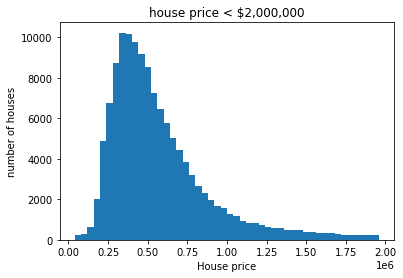

In [ ]:
# property values

import matplotlib.pyplot as plt
import numpy as np

# df = pd.DataFrame()
# data["BLDG_VALUE_num"] = data['BLDG_VALUE'].replace({'\$': '', ',': ''}, regex=True)
# data = data[data['BLDG_VALUE_num'].notna()]
# data["BLDG_VALUE_num"] = pd.cut(data['BLDG_VALUE_num'].astype(float), bins=10, labels=range(1, 11)).astype(float)

# group the data by grade and count the number of rows in each group
# property values
AB_data = data
df = pd.DataFrame()
AB_data["BLDG_VALUE_num"] = AB_data['BLDG_VALUE'].replace({'\$': '', ',': ''}, regex=True)
AB_data = AB_data[AB_data['BLDG_VALUE_num'].notna()]
AB_data["BLDG_VALUE_num"] = AB_data["BLDG_VALUE_num"].astype(float)

AB_data = AB_data[AB_data["LU_DESC"].str.contains("ADMINISTRATIVE|CLUB|COMPUTER|INN|MANUFACTURING|MULTI-USE|ORGANIZATION|Organization|SHOWROOM|BILLBOARD|STATION|TERMINAL|BANK|MEDICAL|STORAGE|CLASSROOM|PLANT|MARKET|ACTIVITY|OFFICE|COLLEGE|HOSPITAL|LABORATORY|GARAGE|Garage|CHURCH|HOTEL|MOTEL|CHARITABLE|PUBLIC|SERVICE|Service|COMPANY|COMMERCIAL|PARKING|GOVERNMENT|LIBRARY|OTHER EXEMPT BLDG|RESTAURANT|Restaurant|SPORTS|GARAGE|WAREHOUSE|STORE|LAB|THEATER|EDUC|SEWER|HIGHWAY|facility|WAREHOUSE")==False]
AB_data = AB_data[AB_data["BLDG_TYPE"].str.contains("ADMINISTRATIVE|CLUB|COMPUTER|INN|MANUFACTURING|MULTI-USE|ORGANIZATION|Organization|SHOWROOM|BILLBOARD|STATION|TERMINAL|BANK|MEDICAL|STORAGE|MFG|MULTI-USE|OFFICE|SCHOOL|LABORATORY|GARAGE|Garage|CHURCH|HOSPITAL|AUDITORIUM|CORRECTIONAL|HOTEL|MOTEL|POWER|SERVICE|Service|POLICE|LIBRARY|MUSEUM|LAB|STORE|THEATER|EDUC|SEWER|NURSING|facility|RESTAURANT|Restaurant|WAREHOUSE")==False]
# AB_data = AB_data[AB_data["OWNER"].str.contains("AUTHORITY")==False]

# AB_data = AB_data[AB_data["LU_DESC"].str.contains("APARTMENT|APT|CONDO|DWELLING|HOME")==True]
# APARTMENT|APT|CONDO|DWELLING|HOME
# AB_data = AB_data[AB_data["BLDG_VALUE_num"]]


AB_data = AB_data.sort_values("BLDG_VALUE_num", ascending= True)
# print(data.iloc[25419]['BLDG_VALUE_num'])
max_bldg_val = AB_data["BLDG_VALUE_num"].max()

print(max_bldg_val)


group_Size = 50
step_size = int(AB_data["BLDG_VALUE_num"].shape[0]/group_Size)
# print(data["BLDG_VALUE_num"])
print(max_bldg_val/step_size)
step_size = int(2e6 / group_Size)

# AB_data.hist(["BLDG_VALUE_num"], bins = [i*step_size for i in range(1, group_Size)])
fig, ax = plt.subplots()
AB_data["BLDG_VALUE_num"].plot(kind="hist", bins = [i*step_size for i in range(1, group_Size)], ax=ax)
ax.set_xlabel("House price")
ax.set_ylabel("number of houses")
ax.set_title("house price < $2,000,000")


# step_size = (max_bldg_val - group_Size*step_size) / group_Size
# AB_data.hist(["BLDG_VALUE_num"], bins = [i*step_size for i in range(1, group_Size)])
# AB_data["BLDG_VALUE_num"].plot(kind="hist", bins = [i*max_bldg_val/group_Size for i in range(1, group_Size)], xlabel="House price", ylabel="number of houses")
# AB_data.hist(["BLDG_VALUE_num"], bins = [i*max_bldg_val/group_Size for i in range(1, group_Size)])

print(AB_data.iloc[25419]['BLDG_VALUE'])
print(AB_data.shape)
AB_data.head(10)


Text(0, 0.5, 'number of houses')

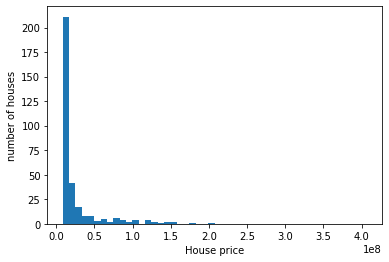

In [ ]:
fig, ax = plt.subplots()
AB_data["BLDG_VALUE_num"].plot(kind="hist", bins = [i*max_bldg_val/group_Size for i in range(1, group_Size)], ax=ax)
ax.set_xlabel("House price")
ax.set_ylabel("number of houses")


In [ ]:

# # One-hot encode the 'ST_NAME' column
# one_hot_df = pd.get_dummies(data['ST_NAME'], prefix='ST_NAME')
# # Replace the street names with numerical values
# new_index = pd.RangeIndex(start=1, stop=len(one_hot_df.columns) + 1, name='ST_NAME')
# data['ST_NAME'] = one_hot_df.values.argmax(1) + 1

# # One-hot encode the 'ST_NUM' column
# one_hot_df = pd.get_dummies(data['ST_NUM'], prefix='ST_NUM')
# # Replace the street names with numerical values
# new_index = pd.RangeIndex(start=1, stop=len(one_hot_df.columns) + 1, name='ST_NUM')
# data['ST_NUM'] = one_hot_df.values.argmax(1) + 1

# # One-hot encode the 'CITY' column
# one_hot_df = pd.get_dummies(data['CITY'], prefix='CITY')
# # Replace the street names with numerical values
# new_index = pd.RangeIndex(start=1, stop=len(one_hot_df.columns) + 1, name='CITY')
# data['CITY'] = one_hot_df.values.argmax(1) + 1


import pandas as pd

def encode_columns_as_index(data, columns):
    data_encoded = data.copy()
    for column in columns:
        one_hot_df = pd.get_dummies(data_encoded[column], prefix=column)
        data_encoded[column] = one_hot_df.values.argmax(axis=1) + 1
    return data_encoded

columns_to_encode = ['ST_NAME', 'ST_NUM', 'CITY', 'BLDG_TYPE', 'LU_DESC', "STRUCTURE_CLASS", 'ROOF_STRUCTURE', 'INT_COND', 'EXT_COND', 'OVERALL_COND', 'BTHRM_STYLE1',
                     'BTHRM_STYLE2', 'BTHRM_STYLE3', 'KITCHEN_TYPE', 'KITCHEN_STYLE1', 'KITCHEN_STYLE2', 'KITCHEN_STYLE3', 'HEAT_TYPE', 'AC_TYPE', 'HEAT_FUEL', 'PROP_VIEW'  ] 

encoded_data = encode_columns_as_index(AB_data, columns_to_encode)


In [ ]:
encoded_data.head()
#data = pd.concat([data.drop('ST_NAME', axis=1), one_hot_df], axis=1)

,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIPCODE,BLDG_SEQ,NUM_BLDGS,LUC,LU,LU_DESC,BLDG_TYPE,OWN_OCC,OWNER,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,LAND_SF,GROSS_AREA,LIVING_AREA,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE,GROSS_TAX,YR_BUILT,YR_REMODEL,STRUCTURE_CLASS,ROOF_STRUCTURE,INT_COND,EXT_COND,OVERALL_COND,BED_RMS,FULL_BTH,HLF_BTH,KITCHEN,TT_RMS,BDRM_COND,BTHRM_STYLE1,BTHRM_STYLE2,BTHRM_STYLE3,KITCHEN_TYPE,KITCHEN_STYLE1,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,NUM_PARKING,PROP_VIEW,BLDG_VALUE_num
16254,1,211,NaN,5,2129,1.0,1.0,441,CL,77,171,N,BOSTON SAND & GRAVEL CO,NaN,NaN,NaN,NaN,1130.0,NaN,NaN,"$10,449.00",$2.00,"$10,451.00",$256.57,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,NaN,1,2.0
55801,1,579,NaN,17,2127,1.0,1.0,390,CL,44,190,N,SB GATEWAY II LLC,NaN,NaN,NaN,NaN,954.0,1.0,1.0,"$17,481.00",$5.00,"$20,672.00",$507.50,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,NaN,1,5.0
55862,1,286,NaN,17,2127,1.0,1.0,390,CL,44,190,N,SB GATEWAY II LLC,NaN,NaN,NaN,NaN,1396.0,1.0,1.0,"$25,580.00",$7.00,"$30,248.00",$742.59,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,NaN,1,7.0
55859,1,286,NaN,17,2127,1.0,1.0,390,CL,44,190,N,SB GATEWAY II LLC,NaN,NaN,NaN,NaN,1400.0,1.0,1.0,"$25,653.00",$7.00,"$30,335.00",$744.72,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,NaN,1,7.0
55860,1,286,NaN,17,2127,1.0,1.0,390,CL,44,190,N,SB GATEWAY II LLC,NaN,NaN,NaN,NaN,1316.0,1.0,1.0,"$24,114.00",$7.00,"$28,515.00",$700.04,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,NaN,1,7.0


In [ ]:
import pandas as pd
# get data from boston area
hmdaUrl = "msamd_14454.csv"
data = pd.read_csv(hmdaUrl)
data.shape
data.head(5)

FileNotFoundError: ignored

In [ ]:
# group by census tract and loan type
grouped_data = data.groupby(["census_tract", "derived_loan_product_type"])

# count the number of loans in each group
loan_counts = grouped_data.size()

loan_counts.to_csv("loan_counts.csv", header=["count"])